In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from struct_data import struct_data

csv_f_name = "../../data/train_data/data_martin_2_forsok2.csv"
annot_f_name = "../../data/annotation/martin_train_2_sensor.txt"

POSE_MAP= {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

knn_train = struct_data(csv_f_name, annot_f_name, POSE_MAP)

In [2]:
df_train = knn_train.df
df_train_id1 = df_train[df_train['SensorId']==1]

df_train_id2 = df_train[df_train['SensorId']==2]

timestamp_offset_1 = df_train_id1[' TimeStamp (s)'].iloc[0]
df_train_id1[' TimeStamp (s)'] = df_train_id1[' TimeStamp (s)'] - timestamp_offset_1

timestamp_offset_2 = df_train_id2[' TimeStamp (s)'].iloc[0]
df_train_id2[' TimeStamp (s)'] = round(df_train_id2[' TimeStamp (s)'] - timestamp_offset_2, 2)

df_train_id1

#knn_train.split_mult_sensor_data(2)
#df_train_id1 = knn_train.df_arr[0]
#df_train_id1




,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
3,1,0.00,0,0.043122,-0.787445,-0.615191,0.273525,0.281865,0.126697,13.444928,...,-0.347415,-0.261269,-0.494613,0.006465,0.006078,-0.006908,0.0,0.0,0.0,0.0
5,1,0.01,1,0.043200,-0.788001,-0.612832,0.345292,0.232233,0.074703,13.444928,...,-0.347430,-0.261297,-0.494617,0.006397,0.006598,-0.009219,0.0,0.0,0.0,0.0
6,1,0.02,2,0.043374,-0.789975,-0.613011,0.220503,0.301048,0.091776,12.943873,...,-0.348105,-0.261321,-0.494458,0.006079,0.008346,-0.008768,0.0,0.0,0.0,0.0
7,1,0.03,3,0.042894,-0.788423,-0.612968,0.149811,0.427152,0.019640,13.209137,...,-0.348097,-0.261355,-0.494469,0.006104,0.006188,-0.008085,0.0,0.0,0.0,0.0
8,1,0.04,4,0.043158,-0.789865,-0.612217,0.362281,0.263699,0.143785,12.884926,...,-0.348112,-0.261383,-0.494478,0.005857,0.007597,-0.008792,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213420,1,1069.73,105598,-0.729275,-0.408668,-0.519516,0.473171,-0.669001,0.180679,-21.982544,...,-0.445918,0.192645,-0.536876,-0.015271,0.000354,-0.008622,0.0,0.0,0.0,0.0
213421,1,1069.74,105599,-0.727673,-0.406786,-0.521677,-0.022571,-0.784094,0.012910,-22.542541,...,-0.445953,0.192694,-0.536846,-0.016945,-0.001544,-0.006349,0.0,0.0,0.0,0.0
213428,1,1069.75,105600,-0.729399,-0.406355,-0.523315,-0.469590,-0.993695,0.318943,-22.483593,...,-0.445966,0.192788,-0.536818,-0.015318,-0.001919,-0.004614,0.0,0.0,0.0,0.0
213432,1,1069.76,105601,-0.729151,-0.405238,-0.522916,0.098314,-0.943940,0.400096,-22.483593,...,-0.446010,0.192856,-0.536807,-0.015682,-0.002970,-0.004899,0.0,0.0,0.0,0.0


In [3]:
df_train_id2

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
0,2,0.00,0,-0.038330,-1.009899,0.014981,-0.020407,0.121994,0.009466,16.878386,...,-0.504644,-0.502279,-0.513858,0.000421,0.010714,-0.001075,0.0,0.0,0.0,0.0
1,2,0.01,1,-0.037530,-1.010232,0.012783,-0.074014,0.084961,0.045757,16.499611,...,-0.504639,-0.502277,-0.513867,-0.000385,0.011047,0.001112,0.0,0.0,0.0,0.0
2,2,0.02,2,-0.038469,-1.008746,0.013279,-0.020162,0.016839,0.011827,16.674431,...,-0.504638,-0.502277,-0.513869,0.000551,0.009561,0.000607,0.0,0.0,0.0,0.0
4,2,0.03,3,-0.037840,-1.010549,0.013716,-0.020298,-0.001596,0.029728,16.616158,...,-0.504639,-0.502274,-0.513871,-0.000083,0.011365,0.000165,0.0,0.0,0.0,0.0
11,2,0.04,4,-0.038195,-1.009316,0.012746,-0.144815,0.104090,0.010998,16.616158,...,-0.504575,-0.502225,-0.513932,0.000272,0.010131,0.001064,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213431,2,1084.43,107830,-0.286485,-0.966179,0.073393,-0.011917,0.039773,-0.039584,8.516173,...,-0.571159,-0.459230,-0.560203,0.001152,0.010629,0.000837,0.0,0.0,0.0,0.0
213433,2,1084.44,107831,-0.288067,-0.965451,0.073956,-0.012284,-0.033060,0.014514,8.516173,...,-0.571135,-0.459197,-0.560242,0.002730,0.009900,0.000240,0.0,0.0,0.0,0.0
213434,2,1084.45,107832,-0.286422,-0.964201,0.075125,0.023776,-0.172248,-0.000171,8.865813,...,-0.571144,-0.459193,-0.560232,0.001066,0.008651,-0.000994,0.0,0.0,0.0,0.0
213436,2,1084.46,107833,-0.287516,-0.964576,0.074196,-0.029438,-0.455551,0.059137,8.720130,...,-0.571168,-0.459173,-0.560213,0.002158,0.009026,-0.000067,0.0,0.0,0.0,0.0


In [ ]:
df_train_id2.index

In [4]:
stamped_poses = knn_train.get_timestamp_and_pose()
print(stamped_poses)

df_train, df_stamped_poses = knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
#print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
#df['Pose'].hist(bins=4)
sns.lineplot(data=df_train, x=" TimeStamp (s)", y='Pose')

[[0.0, 123.8, 0], [128.72, 243.32, 1], [246.28, 363.32, 2], [369.6, 484.24, 3], [487.2, 603.6, 4], [608.48, 725.48, 5], [729.52, 844.76, 6], [849.44, 963.44, 7], [966.92, 1082.96, 8]]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\simon\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-62a8c4b293be>", line 4, in <module>
    df_train, df_stamped_poses = knn_train.align_poses(stamped_poses)
  File "c:\Users\simon\Documents\GotYourBack\Got-Your-Back\model\ml_algorithms\..\struct_data.py", line 64, in align_poses
    self.df = self.df.drop(row_index)
  File "C:\Users\simon\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py", line 4305, in drop
    return super().drop(
  File "C:\Users\simon\AppData\Roaming\Python\Python38\site-packag

TypeError: object of type 'NoneType' has no len()

<AxesSubplot:xlabel='SensorId', ylabel='Count'>

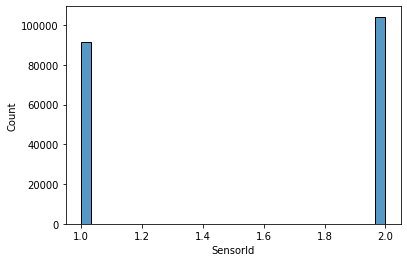

In [71]:
sns.histplot(data=df_train['SensorId'])

In [50]:
x_train = df_train.drop([' TimeStamp (s)'],axis=1)
x_train = x_train.drop(['Pose', ' MagX (uT)',' MagY (uT)',' MagZ (uT)', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)', ' Pressure (kPa)',' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis=1)
# x_train[x_train['SensorId'] == 1]
x_train

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,2,-0.038330,-1.009899,0.014981,-0.020407,0.121994,0.009466,90.797035,-2.172571,91.873466,0.478540,-0.504644,-0.502279,-0.513858
1,2,-0.037530,-1.010232,0.012783,-0.074014,0.084961,0.045757,90.796272,-2.173043,91.874306,0.478537,-0.504639,-0.502277,-0.513867
2,2,-0.038469,-1.008746,0.013279,-0.020162,0.016839,0.011827,90.796051,-2.173169,91.874474,0.478537,-0.504638,-0.502277,-0.513869
3,1,0.043122,-0.787445,-0.615191,0.273525,0.281865,0.126697,51.475594,2.842351,67.997047,0.752595,-0.347415,-0.261269,-0.494613
4,2,-0.037840,-1.010549,0.013716,-0.020298,-0.001596,0.029728,90.795845,-2.173470,91.874458,0.478536,-0.504639,-0.502274,-0.513871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213420,1,-0.729275,-0.408668,-0.519516,0.473171,-0.669001,0.180679,37.711689,-48.122597,58.448025,0.689789,-0.445918,0.192645,-0.536876
213421,1,-0.727673,-0.406786,-0.521677,-0.022571,-0.784094,0.012910,37.716698,-48.128872,58.440990,0.689777,-0.445953,0.192694,-0.536846
213428,1,-0.729399,-0.406355,-0.523315,-0.469590,-0.993695,0.318943,37.715969,-48.138680,58.435657,0.689763,-0.445966,0.192788,-0.536818
213432,1,-0.729151,-0.405238,-0.522916,0.098314,-0.943940,0.400096,37.719868,-48.148590,58.431744,0.689725,-0.446010,0.192856,-0.536807


In [51]:
print(y_train)
print(len(y_train))

0         0
1         0
2         0
3         0
4         0
         ..
213420    8
213421    8
213428    8
213432    8
213435    8
Name: Pose, Length: 195673, dtype: int64
195673


In [10]:
"""
csv_file = "../../data/test_data/Simon_test_1.csv"
annot_file = "../../data/annotation/Simon_test_1.txt"
"""
csv_file = "../../data/test_data/martin_test_2sensorer.csv"
annot_file = "../../data/annotation/martin_test_2_sensor.txt"


knn_test = struct_data(csv_file, annot_file, POSE_MAP)
s_poses = knn_test.get_timestamp_and_pose()
print(s_poses)
df_test, df_stamped_poses = knn_test.align_poses(s_poses)

y_test = df_stamped_poses #df_test["Pose"]

[[0.0, 9.12, 0], [11.36, 19.0, 1], [20.44, 29.2, 2], [31.08, 39.68, 3], [41.08, 48.96, 4], [51.24, 59.68, 5], [61.84, 69.32, 6], [70.92, 78.92, 7], [81.08, 89.6, 8]]
after drops: 9052
drops: 7910
9052


<AxesSubplot:xlabel='SensorId', ylabel='Count'>

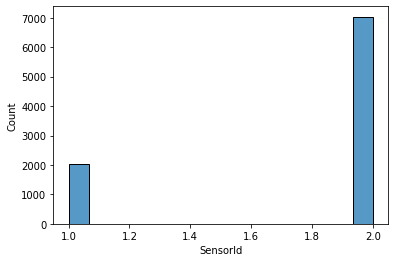

In [70]:
sns.histplot(data=df_test['SensorId'])

In [54]:
x_test = df_test.drop([' TimeStamp (s)'],axis=1)
#x_test = x_test.drop(['Pose'],axis=1)
x_test = x_test.drop(['Pose', ' FrameNumber', ' LinAccX (g)', ' LinAccY (g)', ' MagX (uT)',' MagY (uT)',' MagZ (uT)', ' LinAccZ (g)', ' Pressure (kPa)',' Altitude (m)', ' Temperature (degC)', ' HeaveMotion (m)'],axis=1)
x_test

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,1.0,0.007109,-1.009733,0.046817,-0.094905,-0.194240,-0.014444,92.724411,0.373840,154.059463,0.157189,-0.160240,-0.705754,-0.671957
1,1.0,0.024004,-0.869259,-0.489941,-0.193093,0.101639,-0.102167,60.998085,1.393590,10.323728,0.858635,-0.504485,-0.056094,-0.071369
2,1.0,0.007397,-1.009613,0.050505,-0.006339,-0.053765,-0.018406,92.734406,0.378434,154.058578,0.157209,-0.160233,-0.705817,-0.671888
3,1.0,0.007311,-1.009685,0.049407,-0.024512,-0.038113,0.016380,92.734161,0.378290,154.058197,0.157211,-0.160236,-0.705815,-0.671889
4,1.0,0.005642,-1.009328,0.048528,-0.095585,-0.055854,0.017424,92.733208,0.378143,154.057632,0.157214,-0.160239,-0.705808,-0.671894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1.0,0.247442,-0.400292,-0.891841,-1.863137,-1.242446,2.743157,23.966084,14.554126,-174.287491,-0.022086,0.134016,-0.199519,-0.970435
16955,1.0,0.246253,-0.399815,-0.890919,-1.065990,-0.616369,2.861733,23.961557,14.536867,-174.263046,-0.022330,0.133912,-0.199464,-0.970455
16956,1.0,0.246998,-0.394692,-0.888392,-0.447510,0.465747,2.954196,23.964575,14.529125,-174.233215,-0.022594,0.133899,-0.199460,-0.970452
16957,1.0,0.247528,-0.387826,-0.890107,-0.625769,0.977093,2.874380,23.966148,14.526376,-174.201965,-0.022862,0.133931,-0.199438,-0.970446


<AxesSubplot:xlabel='SensorId', ylabel='Count'>

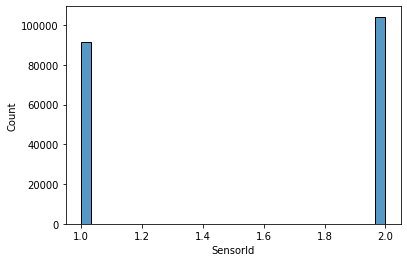

In [64]:
sns.histplot(x_train['SensorId'])

In [55]:
"""
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

k = 1
accuracy_array = []
k_array = []

for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0

    print(y_test[1200:1230])
   
    for n in range(len(predictions)):
        if(predictions[n] == y_test[n]):
            number_of_corrects += 1

    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)

resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    

sns.lineplot(data=resframe,x="k",y="%")
"""


'\nfrom sklearn import svm\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.neighbors import KNeighborsClassifier\n\nk = 1\naccuracy_array = []\nk_array = []\n\nfor num in range(20):\n    \n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(x_train,y_train)\n    predictions = neigh.predict(x_test)\n    number_of_corrects = 0\n\n    print(y_test[1200:1230])\n   \n    for n in range(len(predictions)):\n        if(predictions[n] == y_test[n]):\n            number_of_corrects += 1\n\n    print("number of correct: {}".format(number_of_corrects))\n    print("number of guesses: {}".format(len(predictions)))\n    print("% correct: {}".format(number_of_corrects/len(predictions)*100))\n    accuracy_array.append(number_of_corrects/len(predictions)*100)\n

In [56]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

#x_train = x_train.drop(['SensorId'], axis=1)
#x_test = x_test.drop(['SensorId'], axis=1)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
#neigh = KNeighborsClassifier(n_neighbors=1)
pipe.fit(x_train,y_train)
predictions = pipe.predict(x_test)


(195673, 14)
(195673,)
(9052, 14)


In [57]:
x_test

,SensorId,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,1.0,0.007109,-1.009733,0.046817,-0.094905,-0.194240,-0.014444,92.724411,0.373840,154.059463,0.157189,-0.160240,-0.705754,-0.671957
1,1.0,0.024004,-0.869259,-0.489941,-0.193093,0.101639,-0.102167,60.998085,1.393590,10.323728,0.858635,-0.504485,-0.056094,-0.071369
2,1.0,0.007397,-1.009613,0.050505,-0.006339,-0.053765,-0.018406,92.734406,0.378434,154.058578,0.157209,-0.160233,-0.705817,-0.671888
3,1.0,0.007311,-1.009685,0.049407,-0.024512,-0.038113,0.016380,92.734161,0.378290,154.058197,0.157211,-0.160236,-0.705815,-0.671889
4,1.0,0.005642,-1.009328,0.048528,-0.095585,-0.055854,0.017424,92.733208,0.378143,154.057632,0.157214,-0.160239,-0.705808,-0.671894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1.0,0.247442,-0.400292,-0.891841,-1.863137,-1.242446,2.743157,23.966084,14.554126,-174.287491,-0.022086,0.134016,-0.199519,-0.970435
16955,1.0,0.246253,-0.399815,-0.890919,-1.065990,-0.616369,2.861733,23.961557,14.536867,-174.263046,-0.022330,0.133912,-0.199464,-0.970455
16956,1.0,0.246998,-0.394692,-0.888392,-0.447510,0.465747,2.954196,23.964575,14.529125,-174.233215,-0.022594,0.133899,-0.199460,-0.970452
16957,1.0,0.247528,-0.387826,-0.890107,-0.625769,0.977093,2.874380,23.966148,14.526376,-174.201965,-0.022862,0.133931,-0.199438,-0.970446


In [58]:
"""
for num in range(len(predictions)):
    print(predictions[num])
"""

'\nfor num in range(len(predictions)):\n    print(predictions[num])\n'

<AxesSubplot:xlabel='x', ylabel='y'>

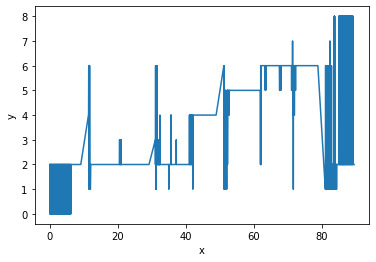

In [59]:
df_predict = pd.DataFrame({'x':df_test[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

[[620   0 892   0   0   0   0   0   0]
 [  0  16 417   0   7   0  23   0   0]
 [  0   0 958  41   0   0   0   0   0]
 [  0   3 926  30  14   0  27   0   0]
 [  0   6  81   2 759   0   0   0   0]
 [  0  43 110   2  52 743   5   0   0]
 [  0   0   5   0   0  42 695   0   0]
 [  0   1   0   0  15  16 828   5   0]
 [  0 311 748   0   0   0 168   4 437]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      1512
           1       0.04      0.03      0.04       463
           2       0.23      0.96      0.37       999
           3       0.40      0.03      0.06      1000
           4       0.90      0.90      0.90       848
           5       0.93      0.78      0.85       955
           6       0.40      0.94      0.56       742
           7       0.56      0.01      0.01       865
           8       1.00      0.26      0.42      1668

    accuracy                           0.47      9052
   macro avg       0.61      0.48      0.42      905

<AxesSubplot:>

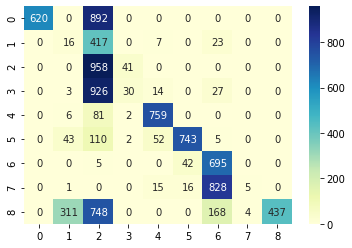

In [61]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap="YlGnBu", annot=True, fmt="d")

In [62]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 4263
number of guesses: 9052
% correct: 47.09456473707468
